In [1]:
#from model_phantom_noise import *
from model_phantom_DB import *
from linares_plot import * 
import itertools

%matplotlib inline
%config InlineBackend.figure_format = 'png' ## 'svg'

%load_ext autoreload
%autoreload 2


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


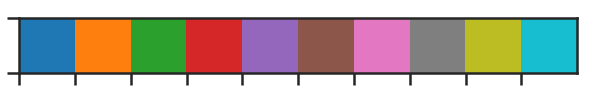

In [2]:
#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(100/2) ;


nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+57) )/360)
p_dist2 = int((N * (90+170) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [12]:

def heatmap_rate_ph(RE, time_simulation, order2, angle_separation, target_onset, 
                 distractor_onset, pres_period, ON_OFF, save_name=False):
    #pal_cyan = sns.color_palette("viridis")
    
    dims=np.shape(RE)
    dimN = dims[0]
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(RE, cmap="cividis", vmin=0, vmax=20,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0, 10, 20], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(20)
    ax.figure.axes[-1].tick_params(labelsize=20)
    ax.axis('tight')
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    p_stim = (180+angle_separation/2) * (dims[0]/360)
    p_dist = (180-angle_separation/2) * (dims[0]/360) 

    stimon = target_onset/2
    stimoff = (target_onset + pres_period) / 2
    diston = distractor_onset/2
    distoff = (distractor_onset + pres_period) / 2


    #plt.gca().plot([stimon, stimon+400], [p_stim, p_stim], ls='--', color ='blue', linewidth=1) 
    #plt.gca().plot([diston, diston+400], [p_dist, p_dist], ls='--', color ='red', linewidth=1) 

    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, int(dimN/4), int(dimN/2),  int(3*dimN/4), int(dimN) ])
    plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)

    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.gca().set_ylim(dimN+60, -45)

    ###

    ##line stims  
    c1='k'
    c2='k'
    
    if order2==False:
        s1on=stimon
        s1off=stimoff
        s2on=diston
        s2off=distoff
        c1='darkorange'
        plt.plot([0, s1on], [-15, -15], linestyle='-', color='k', linewidth=2)
        plt.plot([s1on, s1on], [-15, -40], linestyle='-', color=c1, linewidth=2)
        plt.plot([s1on, s1off], [-40, -40], linestyle='-', color=c1, linewidth=2)
        plt.plot([s1off, s1off], [-15, -40], linestyle='-', color=c1, linewidth=2)
        plt.plot([s1off, s2on], [-15, -15], linestyle='-', color='k', linewidth=2)
        plt.plot([s2on, s2on], [-15, -40],linestyle='--', color=c2, linewidth=2)
        plt.plot([s2on, s2off], [-40, -40],linestyle='--', color=c2, linewidth=2)
        plt.plot([s2off, s2off], [-15, -40], linestyle='--', color=c2, linewidth=2)
        plt.plot([s2off, dims[1]], [-15, -15], linestyle='-', color='k', linewidth=2)
    else:
        s1on=diston
        s1off=distoff
        s2on=stimon
        s2off=stimoff
        c2='darkorange'
        plt.plot([0, s1on], [-15, -15], linestyle='--', color='k', linewidth=2)
        plt.plot([s1on, s1on], [-15, -40], linestyle='--', color=c1, linewidth=2)
        plt.plot([s1on, s1off], [-40, -40], linestyle='--', color=c1, linewidth=2)
        plt.plot([s1off, s1off], [-15, -40], linestyle='--', color=c1, linewidth=2)
        plt.plot([s1off, s2on], [-15, -15], linestyle='--', color='k', linewidth=2)
        plt.plot([s2on, s2on], [-15, -40],linestyle='-', color=c2, linewidth=2)
        plt.plot([s2on, s2off], [-40, -40],linestyle='-', color=c2, linewidth=2)
        plt.plot([s2off, s2off], [-15, -40], linestyle='-', color=c2, linewidth=2)
        plt.plot([s2off, dims[1]], [-15, -15], linestyle='-', color='k', linewidth=2)
    
    ###
    if ON_OFF=='ON':
        plt.text(dims[1]-300, 450, 'ON', weight="bold", fontsize=28, color='white');
    else:
        plt.text(dims[1]-300, 450, 'OFF', weight="bold", fontsize=28, color='white');
        

    
    #time
    x1sec = 1000 * dims[1] / time_simulation
    plt.plot([dims[1]-x1sec, dims[1]], [dimN+30, dimN+30], 'k-', linewidth=2)
    plt.text(dims[1]-300, 600, '1s', fontsize=20);
    
    
    if save_name!=False:
        plt.savefig(save_name + '.png', transparent=True) ##to save it transparent
    plt.show()

## Example

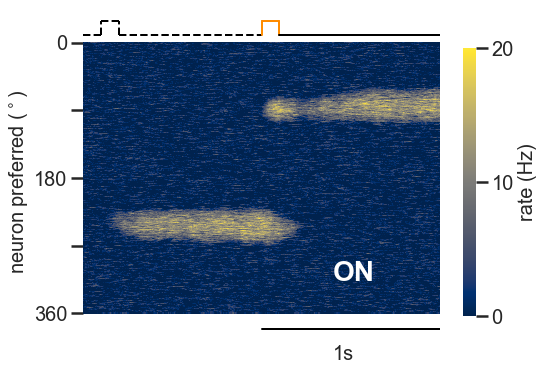

In [51]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

phantom_on= model(totalTime=2000, targ_onset_1=10000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=100, phantom_on = 'on', phnatom_duration=300)

heatmap_rate_ph(flipud(phantom_on[4]), time_simulation=2000, order2=True, 
              angle_separation=55, target_onset=1000, distractor_onset=100, 
              pres_period=100, ON_OFF='ON', save_name='C:\\Users\\David\\Desktop\\on_phantom_example')

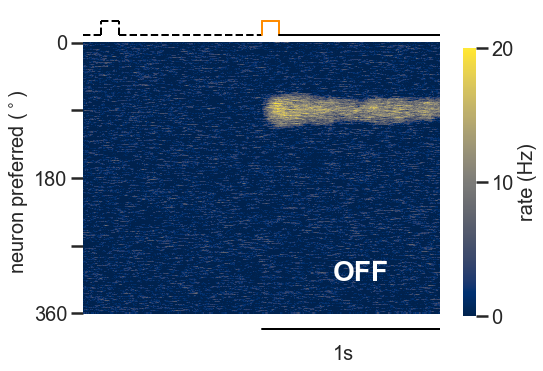

In [71]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

phantom_off= model(totalTime=2000, targ_onset_1=10000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=100, phantom_on = 'on', phnatom_duration=300)

heatmap_rate_ph(flipud(phantom_off[4]), time_simulation=2000, order2=True, 
              angle_separation=55, target_onset=1000, distractor_onset=100, 
              pres_period=100, ON_OFF='OFF', save_name='C:\\Users\\David\\Desktop\\off_phantom_example')

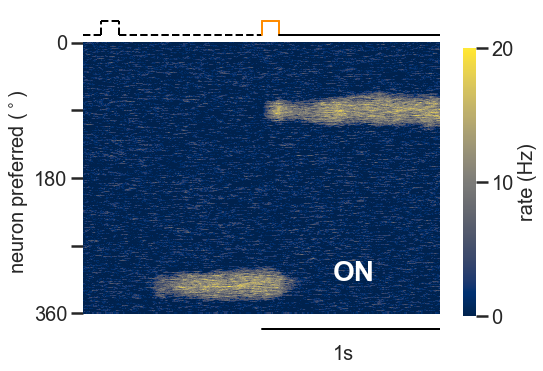

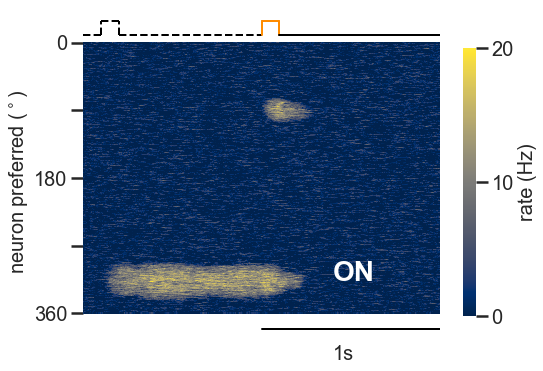

In [75]:
#### Simultaions ON (phantom)
##############################

fee=0.94
fei=0.92
fie=1.14
fii=1.08

n_sim_ph=2 #25
firing_phant_on=[]
firing_all_on =[]
RE_on=[]
RE_on_stim=[]

for g in range(n_sim_ph):
    on= model(totalTime=2000, targ_onset_1=10000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
               angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5., k_noise=0.6,             
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=100, phantom_on='on', phnatom_duration=300)
    heatmap_rate_ph(flipud(on[4]), time_simulation=2000, order2=True, 
              angle_separation=55, target_onset=1000, distractor_onset=100, 
              pres_period=100, ON_OFF='ON', save_name=False)
    plt.show()
    RE_on.append(on[4][:, 50:500])
    RE_on_stim.append(on[4][:, 500:])
    mean_firing=on[4][:, 50:500].mean()
    firing_phant_on.append(mean_firing)
    firing_all_on.append( on[4].mean(axis=0) )

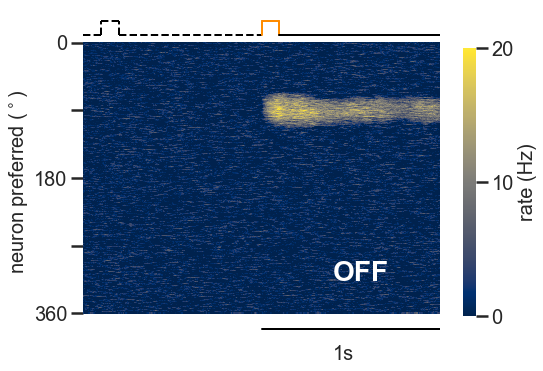

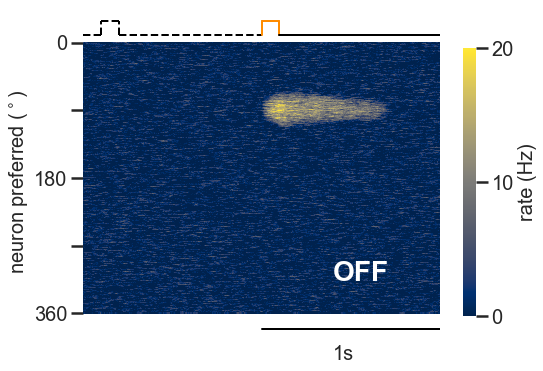

In [73]:
#### Simultaions OFF (phantom)
##############################


fee=0.94
fei=0.92
fie=1.14
fii=1.08

n_sim_ph=2 #25
firing_phant_off=[]
RE_off_stim=[]
RE_off=[]
firing_all_off=[]

for g in range(n_sim_ph):
    off= model(totalTime=2000, targ_onset_1=10000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
               angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5., k_noise=0.6,             
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=100,  phantom_on='on', phnatom_duration=300)
    heatmap_rate_ph(flipud(off[4]), time_simulation=2000, order2=True, 
              angle_separation=55, target_onset=1000, distractor_onset=100, 
              pres_period=100, ON_OFF='OFF', save_name=False)
    plt.show()
    mean_firing=off[4][:, 50:500].mean()
    RE_off.append(off[4][:, 50:500])
    RE_off_stim.append(off[4][:, 500:])
    firing_phant_off.append(mean_firing)
    firing_all_off.append( off[4].mean(axis=0) )

In [54]:
ph_on=pd.DataFrame(firing_phant_on)
ph_on['stimulation']='ON'
ph_off=pd.DataFrame(firing_phant_off)
ph_off['stimulation']='OFF'

df_ph = pd.concat([ph_on, ph_off])
df_ph.columns=['mean_firing', 'stimulation']
df_ph['order']='2nd'

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


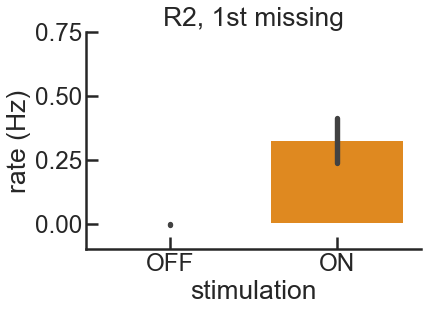

In [63]:
%config InlineBackend.figure_format = 'png' ## 'svg'

ax = plt.figure()

sns.barplot(x='stimulation', y='mean_firing', order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=df_ph)
plt.ylabel(r'rate (Hz)')
plt.title('R2, 1st missing')
plt.ylim(-0.1,0.8)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.ylim(-0.1 , 0.75)
plt.yticks([0, 0.25, 0.5, 0.75])
plt.show()

ax.savefig('C:\\Users\\David\\Desktop\\firing_phantoms.svg', transparent=True)

In [56]:
pop_stim_max_off= np.array(RE_off_stim).max()
pop_stim_max_on = np.array(RE_on_stim).max()
wind=70

off=[] ## no stimulation

for i in range(len(RE_off)):
    b = RE_off[i].mean(axis=1)[int(270*512/360 - wind):  int(270*512/360 + wind) ]
    c =[x for x in RE_off[i].mean(axis=1) if x not in b]
    off.append(c /   pop_stim_max_off) ### RE_off_stim[i].max(axis=1)) 
    
    
off = list(itertools.chain.from_iterable(off))


on=[] ## stimulation

for i in range(len(RE_on)):
    b = RE_on[i].mean(axis=1)[int(270*512/360 - wind):  int(270*512/360 + wind) ]
    c =[x for x in RE_on[i].mean(axis=1) if x not in b]
    on.append( c/ pop_stim_max_on) ### RE_on_stim[i].max(axis=1)) 
    
    
on = list(itertools.chain.from_iterable(on))

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


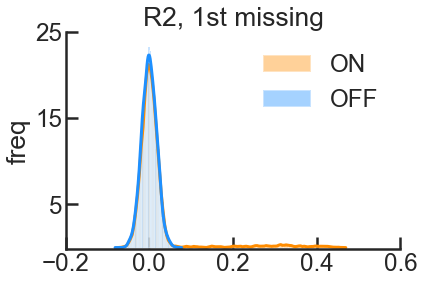

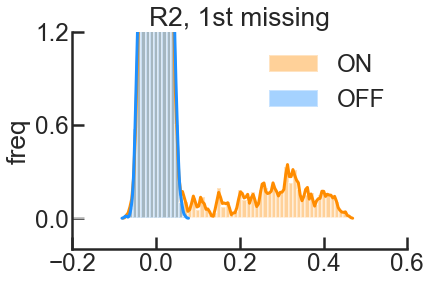

In [69]:
ax = plt.figure()

sns.distplot(on, color=c_on, label='ON')
sns.distplot(off, color=c_off, label='OFF')
#plt.ylim(-0.1, 7. )
plt.title('R2, 1st missing')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('');
plt.legend(frameon=False)
plt.xlim(-0.2, 0.6 );
plt.ylim(-0.2,25)
plt.yticks([5,15,25])
plt.show()
ax.savefig('C:\\Users\\David\\Desktop\\dist_firings_off_phantom.svg', transparent=True)


ax = plt.figure()
sns.distplot(on, color=c_on, label='ON', bins=np.linspace(-1, 1, 200) )
sns.distplot(off, color=c_off, label='OFF', bins=np.linspace(-1, 1, 200))
plt.ylim(-0.2, 1.2 );
plt.xlim(-0.2, 0.6 );
#plt.title('max st1 / bump max st2')
plt.title('R2, 1st missing')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('');
plt.legend(frameon=False)
plt.ylim(-0.2, 1.2 );
plt.yticks([0,0.6,1.2])
plt.show()

ax.savefig('C:\\Users\\David\\Desktop\\dist_firings_on_phantom.svg', transparent=True)


## Remember 1st, second missing

In [4]:
fee=1
fei=1
fie=1
fii=1

on= model(totalTime=2000, targ_onset_1=100, targ_onset_2=10000, angle_target_i=90, presentation_period=100,
           angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=1000, phnatom_duration=300, phantom_on = 'off')

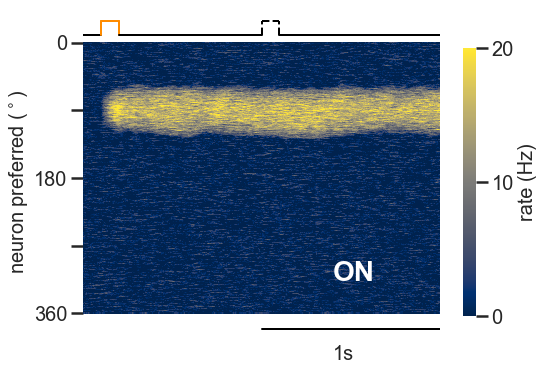

In [13]:
heatmap_rate_ph(flipud(on[4]), time_simulation=2000, order2=False, 
              angle_separation=55, target_onset=100, distractor_onset=1000, 
              pres_period=100, ON_OFF='ON')

In [14]:
fee=1
fei=1
fie=1
fii=1

off= model(totalTime=2000, targ_onset_1=100, targ_onset_2=10000, angle_target_i=90, presentation_period=100,
           angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=1000, phnatom_duration=300, phantom_on = 'off')

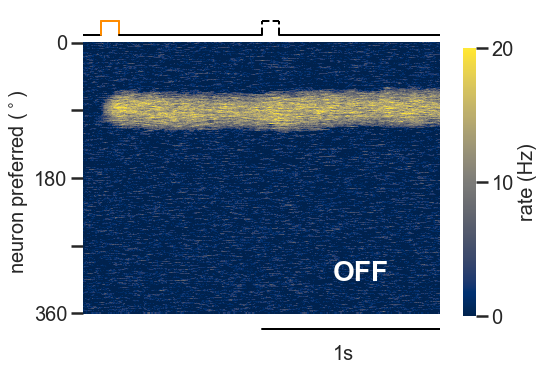

In [16]:
heatmap_rate_ph(flipud(off[4]), time_simulation=2000, order2=False, 
              angle_separation=55, target_onset=100, distractor_onset=1000, 
              pres_period=100, ON_OFF='OFF')

In [17]:
## files de Baheviour_&_Phantom

on2=np.load('on2_200.npy')
off2=np.load('off2_200.npy')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


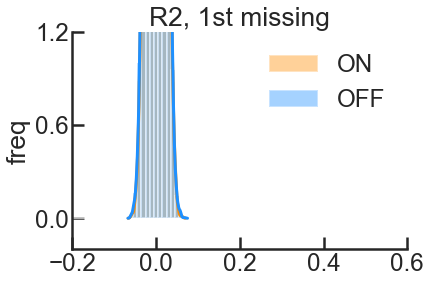

In [18]:
ax = plt.figure()
sns.distplot(on2, color=c_on, label='ON', bins=np.linspace(-1, 1, 200) )
sns.distplot(off2, color=c_off, label='OFF', bins=np.linspace(-1, 1, 200))
plt.ylim(-0.2, 1.2 );
plt.xlim(-0.2, 0.6 );
#plt.title('max st1 / bump max st2')
plt.title('R2, 1st missing')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('');
plt.legend(frameon=False)
plt.ylim(-0.2, 1.2 );
plt.yticks([0,0.6,1.2])
plt.show()